Binary search tree is a data structure that quickly allows us to maintain a sorted list of numbers.

It is called a binary tree because each tree node has a maximum of two children.

The properties that separate a binary search tree from a regular binary tree is

    1. All nodes of left subtree are less than the root node
    2. All nodes of right subtree are more than the root node
    3. Both subtrees of each node are also BSTs i.e. they have the above two properties

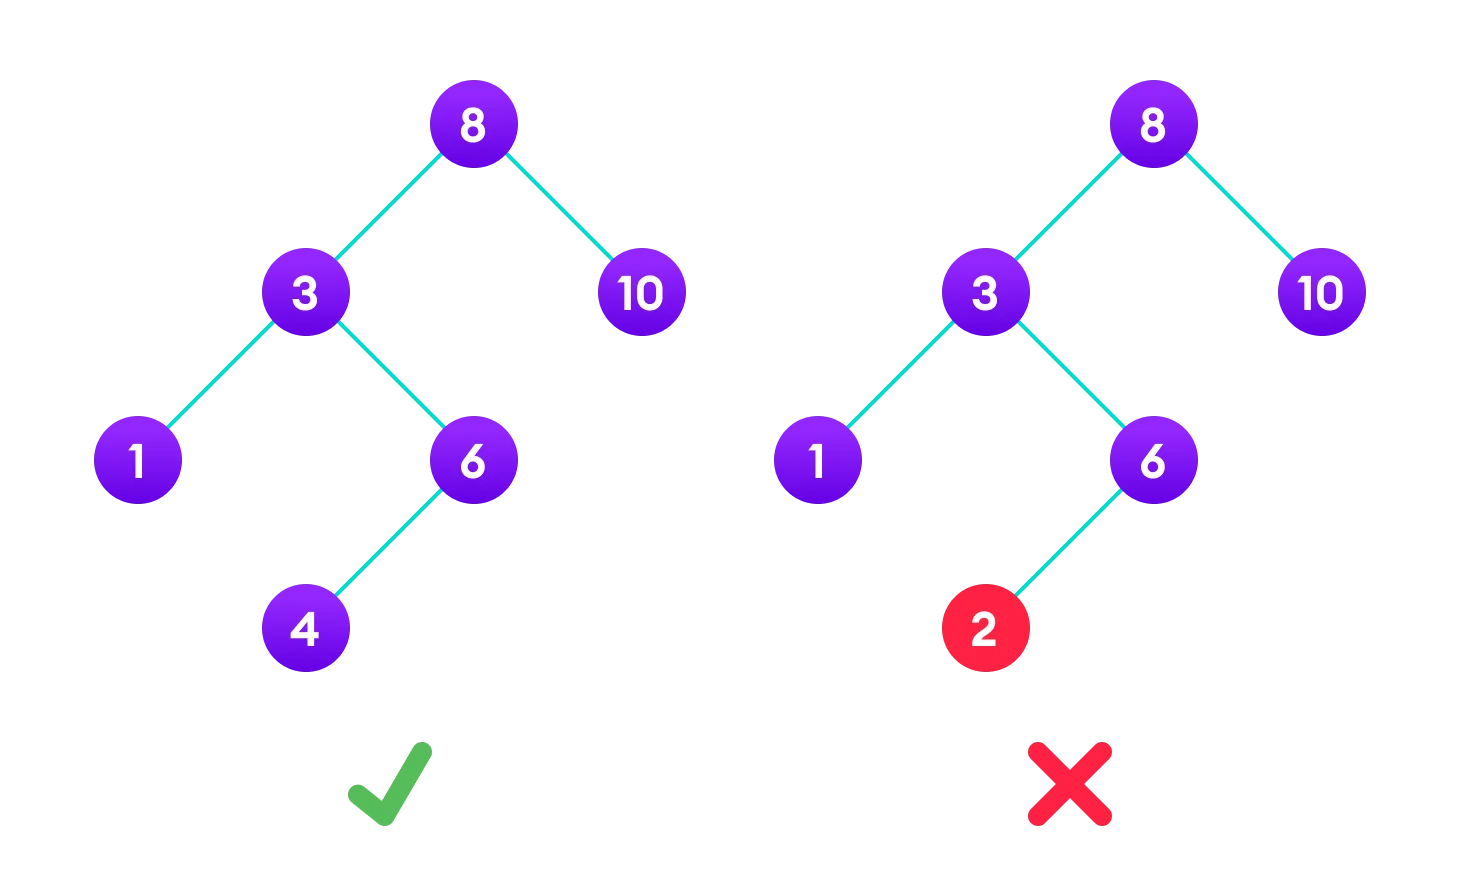

The binary tree on the right isn't a binary search tree because the right subtree of the node "3" contains a value smaller than it.

There are two basic operations that you can perform on a binary search tree:

### Search Operation
The algorithm depends on the property of BST that if each left subtree has values below root and each right subtree has values above the root.

If the value is below the root, we can say for sure that the value is not in the right subtree; we need to only search in the left subtree and if the value is above the root, we can say for sure that the value is not in the left subtree; we need to only search in the right subtree.

4 is not found so, traverse through the left subtree of 8

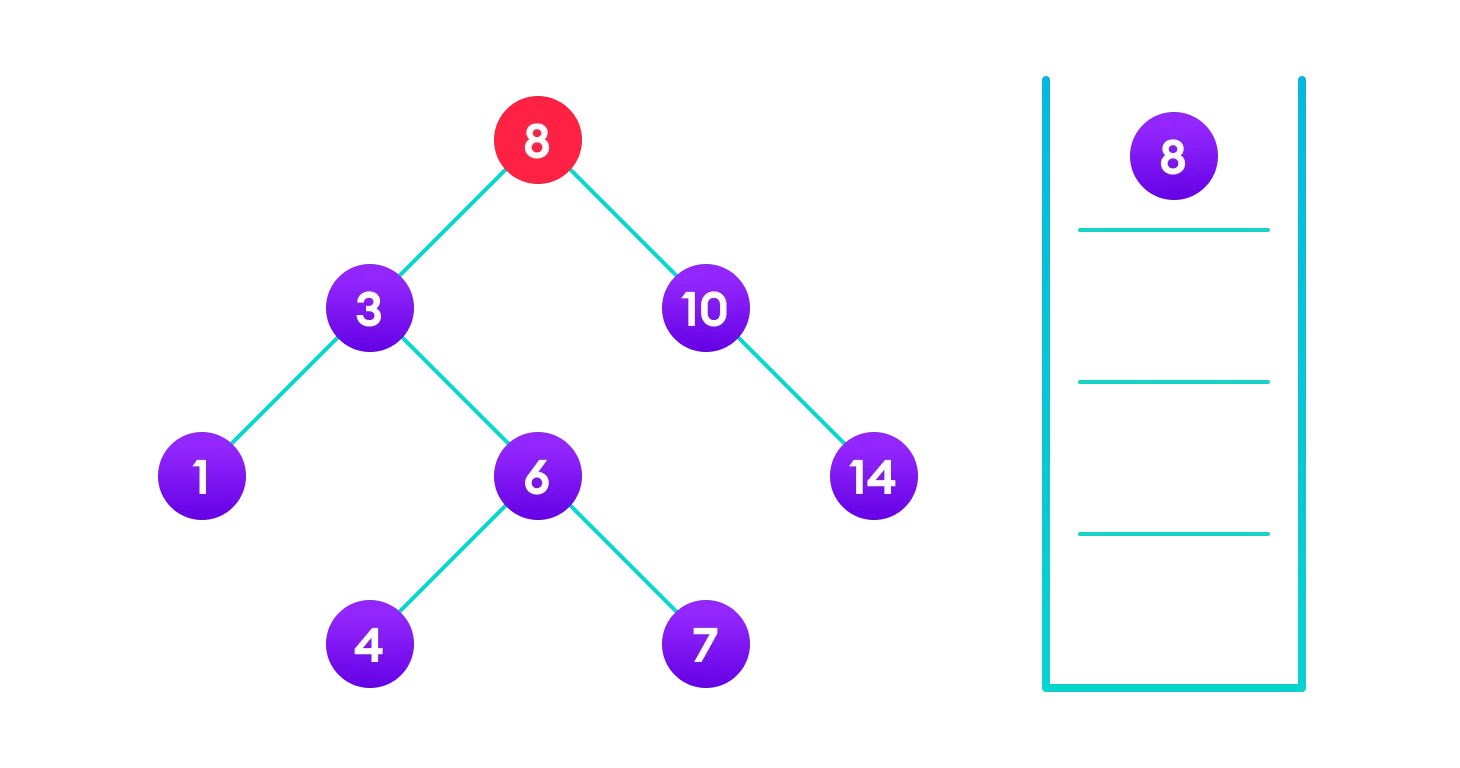

4 is not found so, traverse through the right subtree of 3
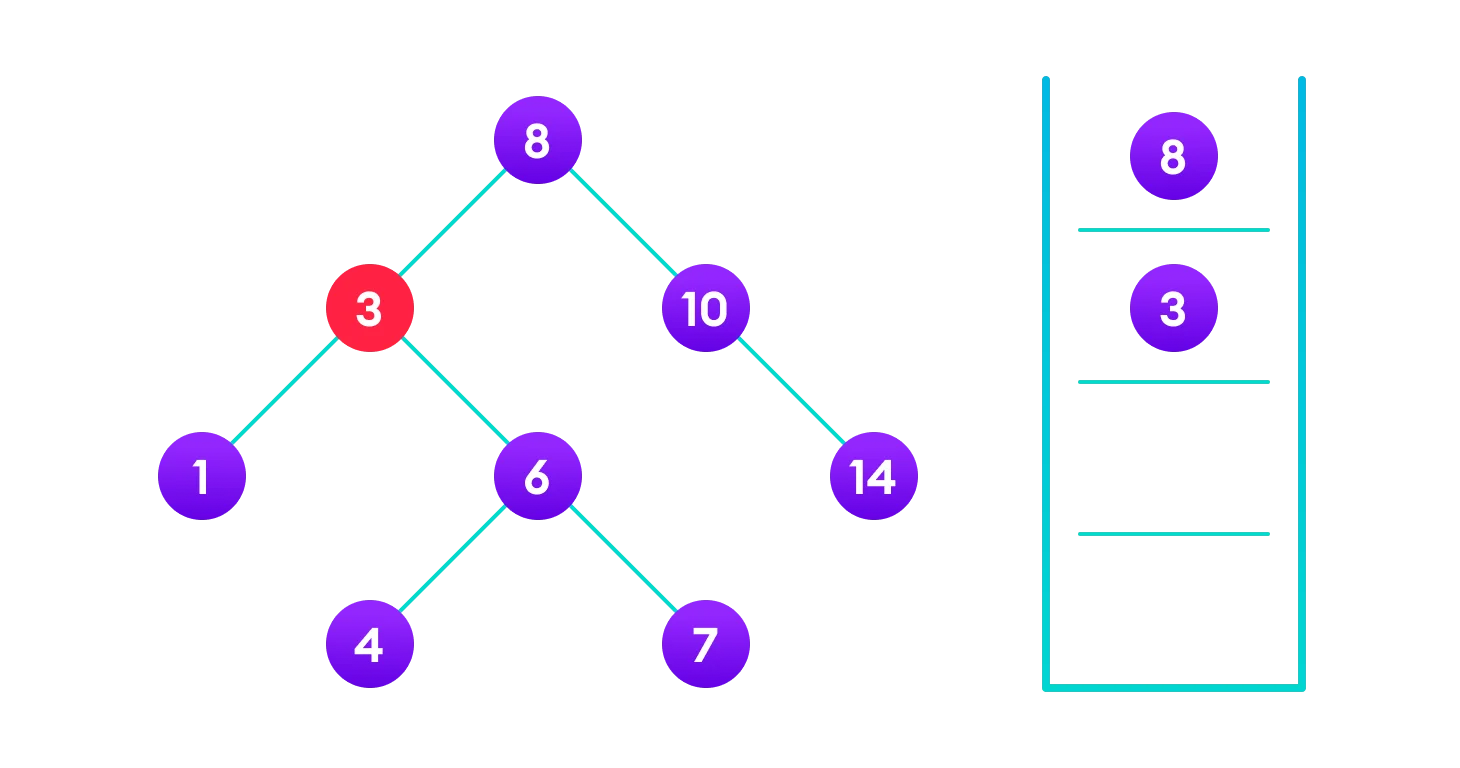

4 is not found so, traverse through the left subtree of 6

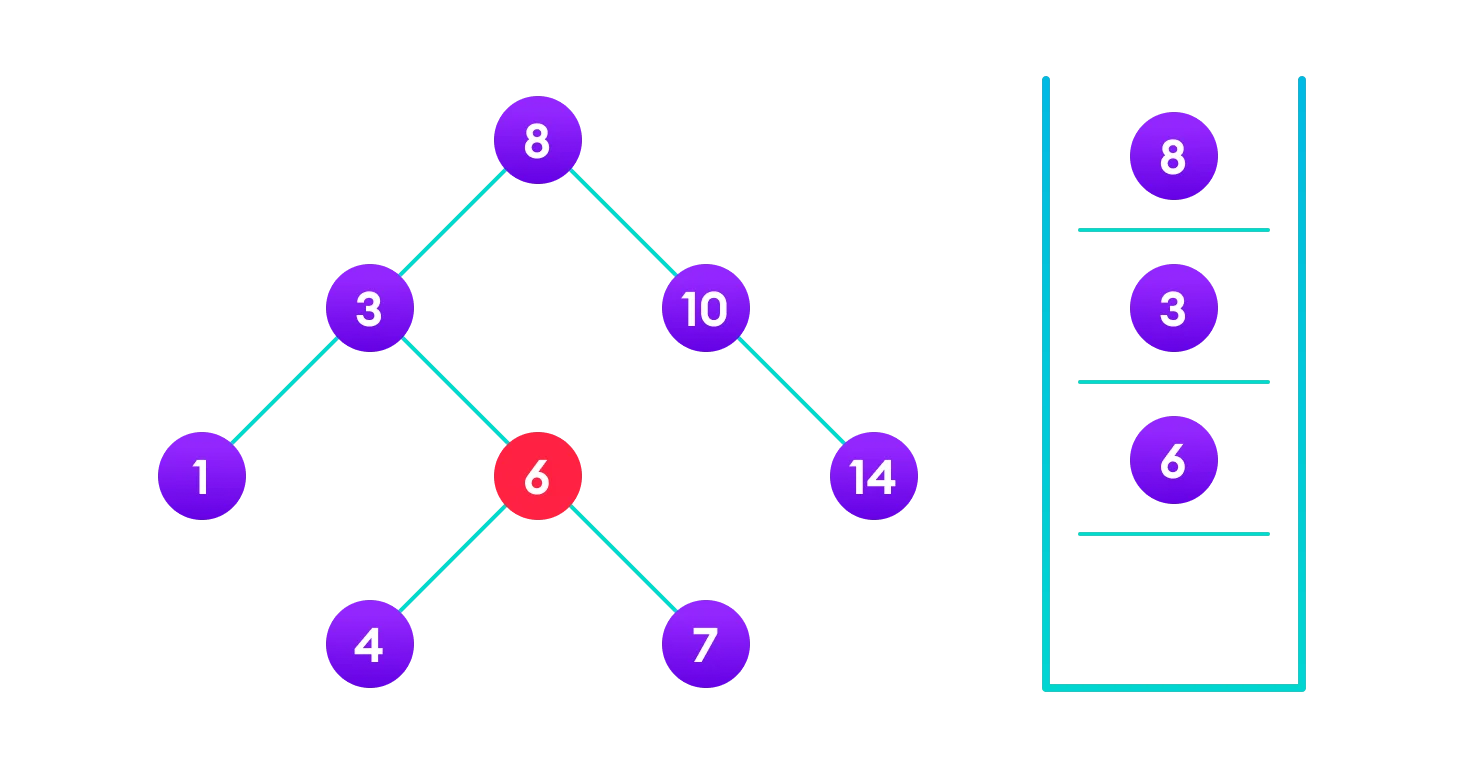

4 is found

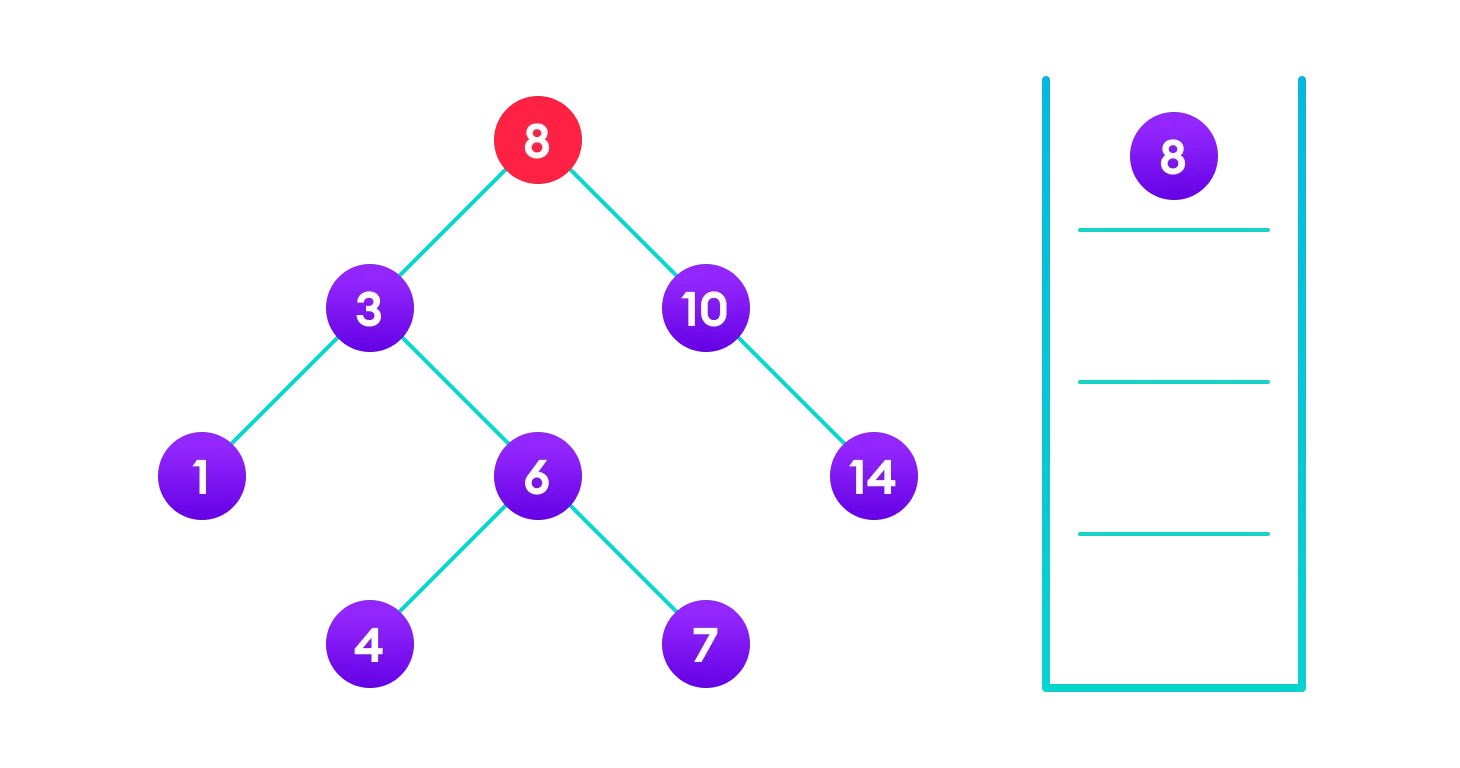

If the value is found, we return the value so that it gets propagated in each recursion step as shown in the image below.

If you might have noticed, we have called return search(struct node*) four times. When we return either the new node or NULL, the value gets returned again and again until search(root) returns the final result.

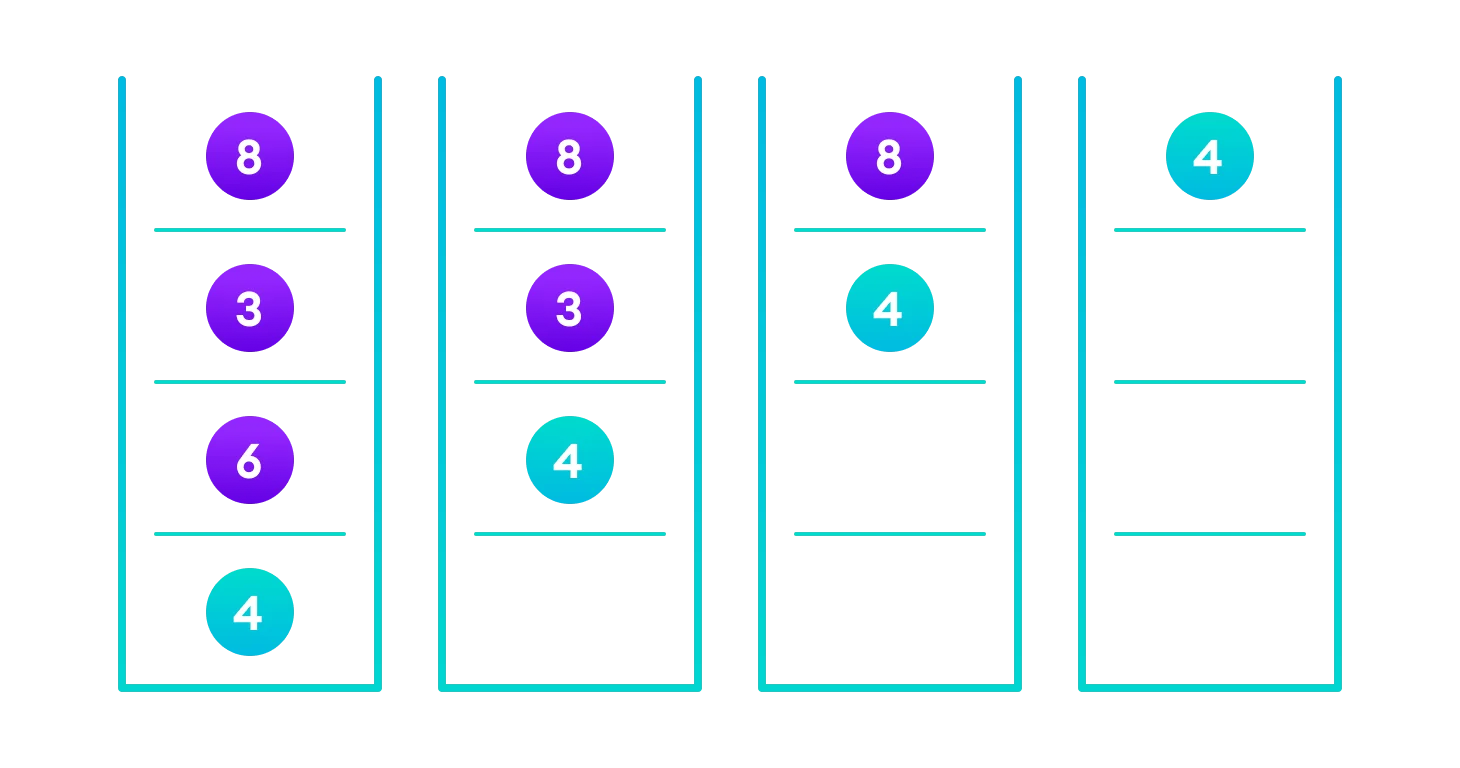

If the value is not found, we eventually reach the left or right child of a leaf node which is NULL and it gets propagated and returned.

### Insert Operation

Inserting a value in the correct position is similar to searching because we try to maintain the rule that the left subtree is lesser than root and the right subtree is larger than root.

Insert Operation
Inserting a value in the correct position is similar to searching because we try to maintain the rule that the left subtree is lesser than root and the right subtree is larger than root.



Insert Operation
Inserting a value in the correct position is similar to searching because we try to maintain the rule that the left subtree is lesser than root and the right subtree is larger than root.



4<8 so, transverse through the left child of 8

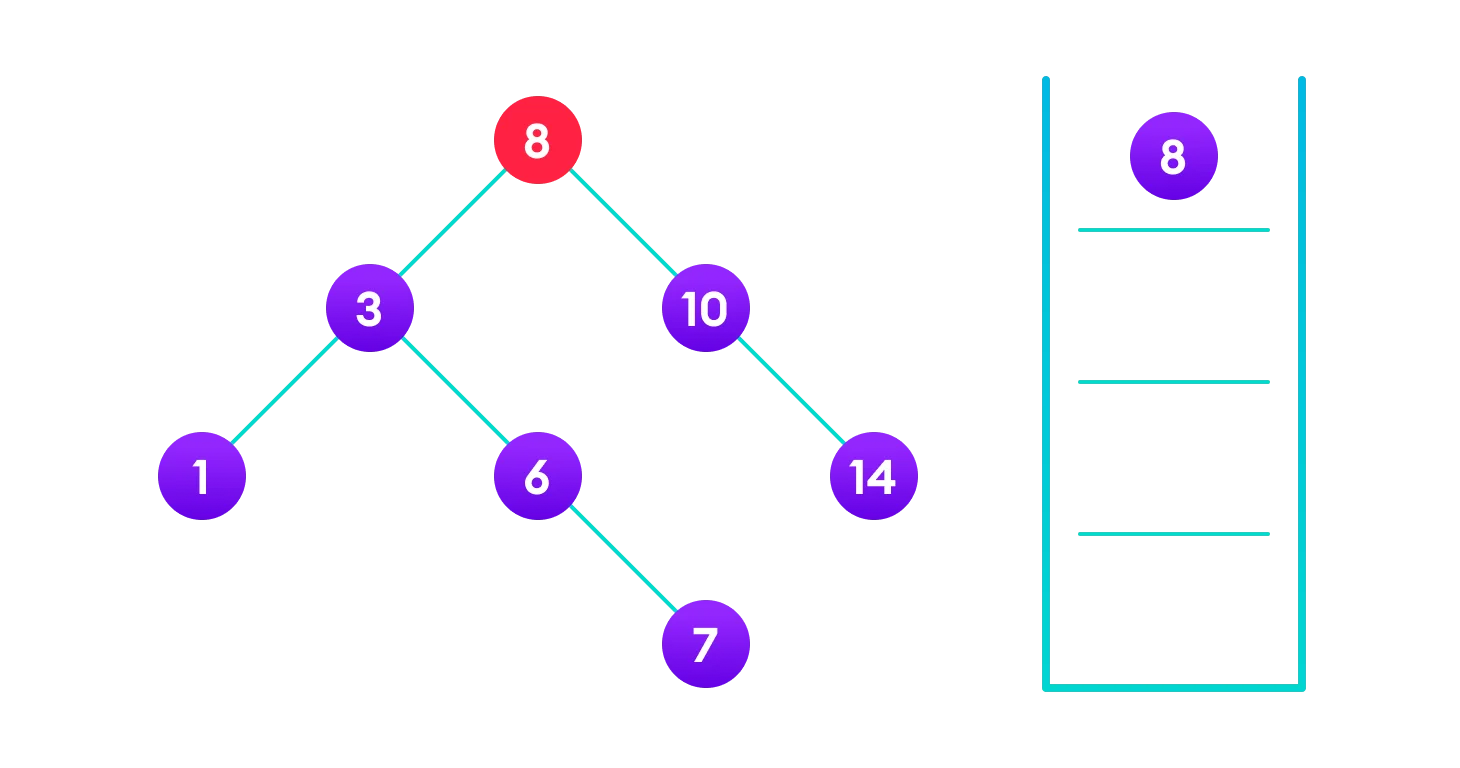

4>3 so, transverse through the right child of 8

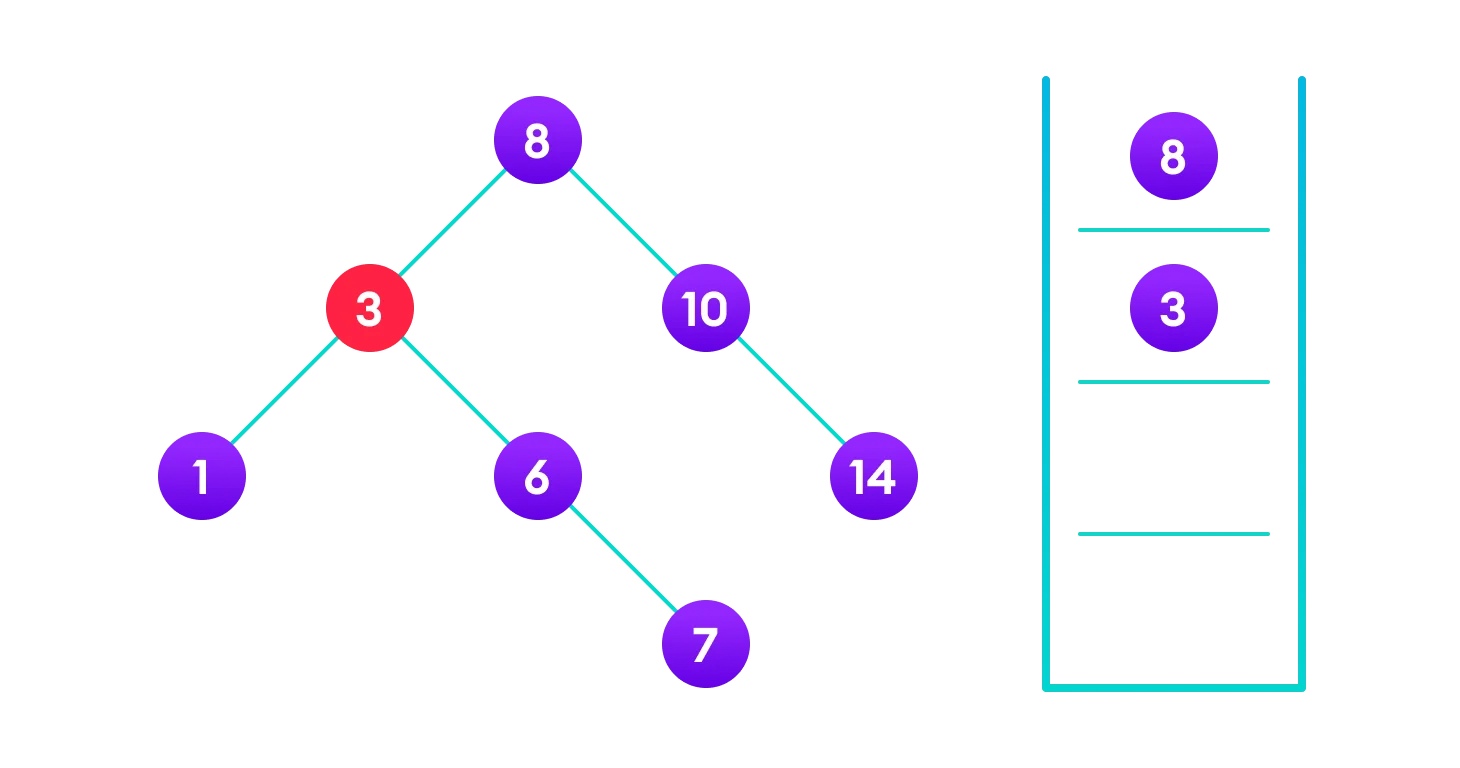

4<6 so, transverse through the left child of 6

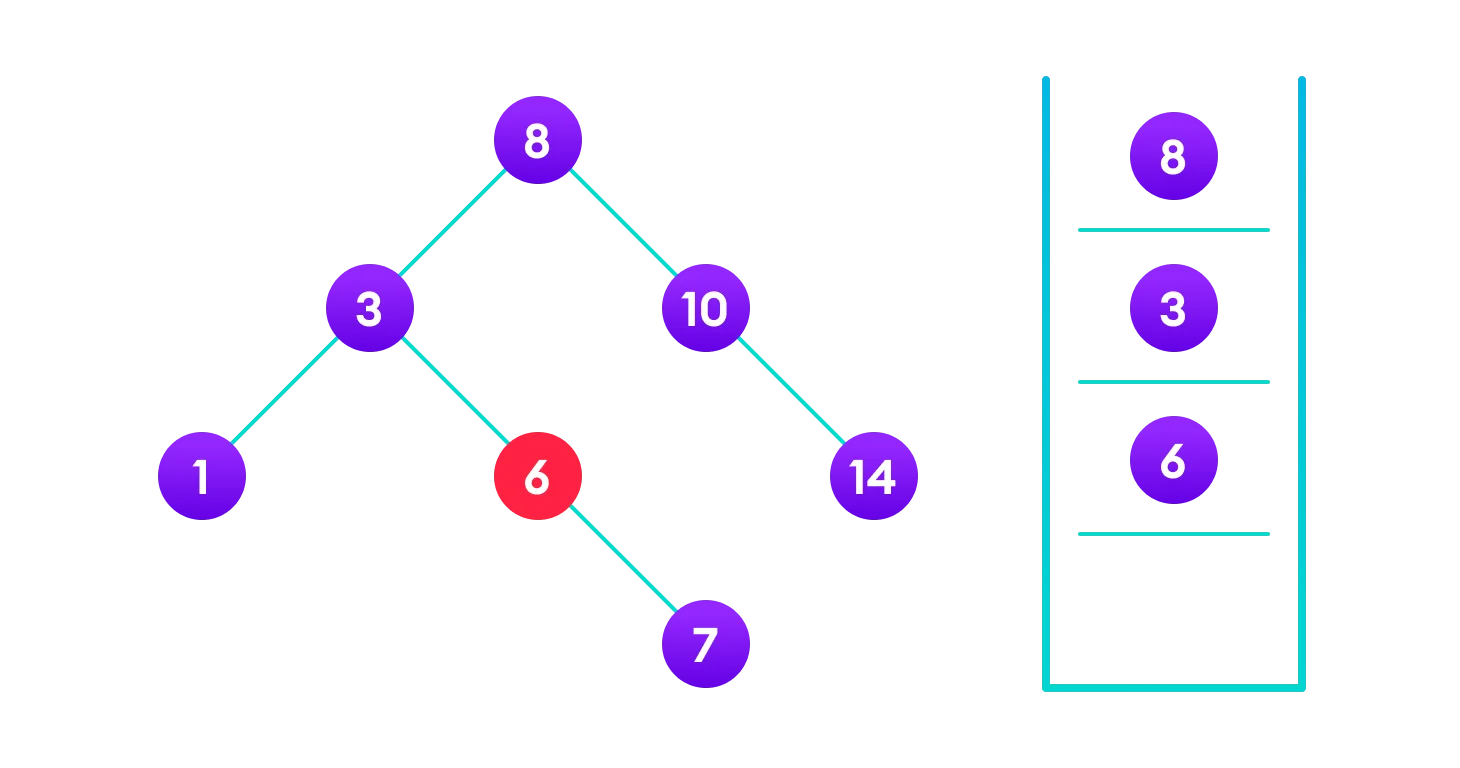

Insert 4 as a left child of 6

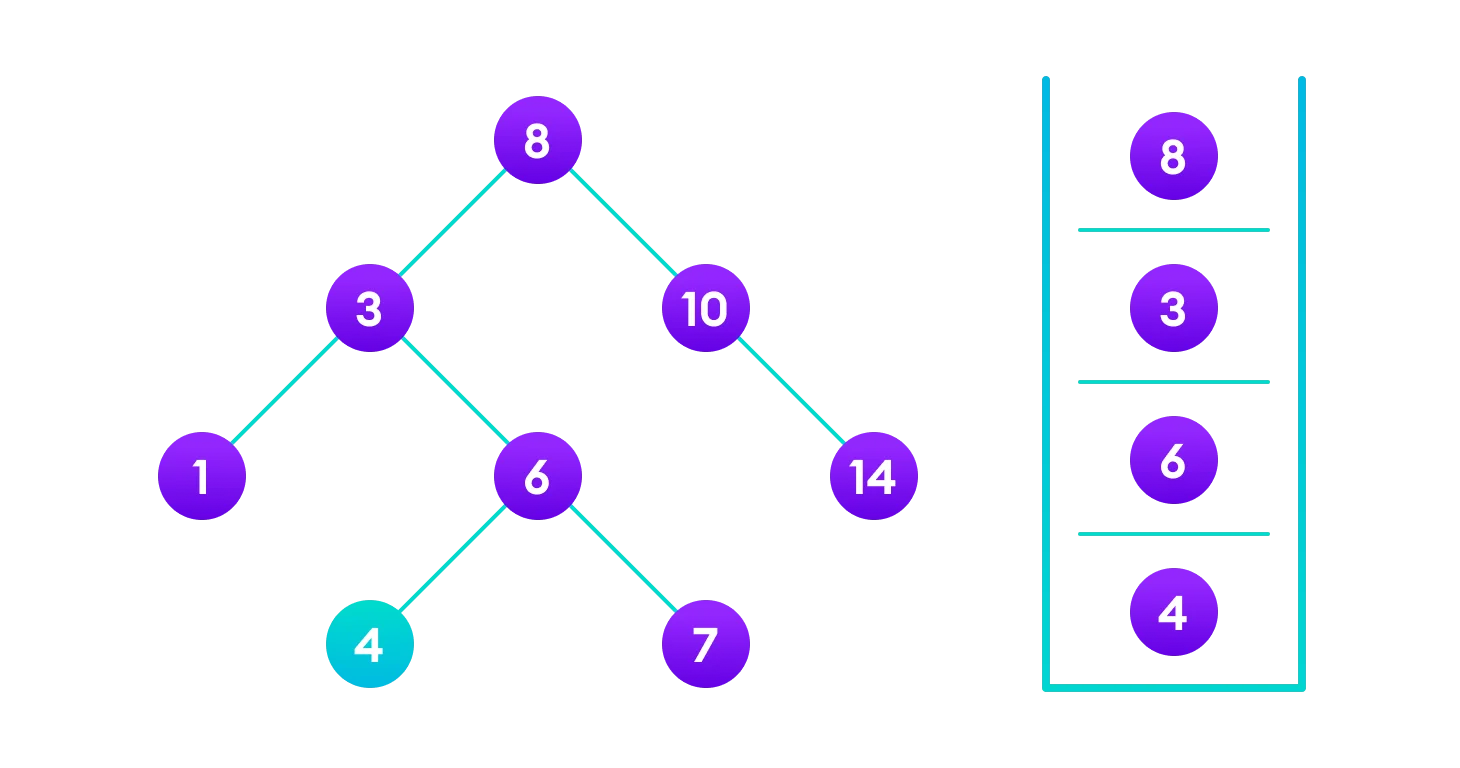

We have attached the node but we still have to exit from the function without doing any damage to the rest of the tree. This is where the return node; at the end comes in handy. In the case of NULL, the newly created node is returned and attached to the parent node, otherwise the same node is returned without any change as we go up until we return to the root.

This makes sure that as we move back up the tree, the other node connections aren't changed.

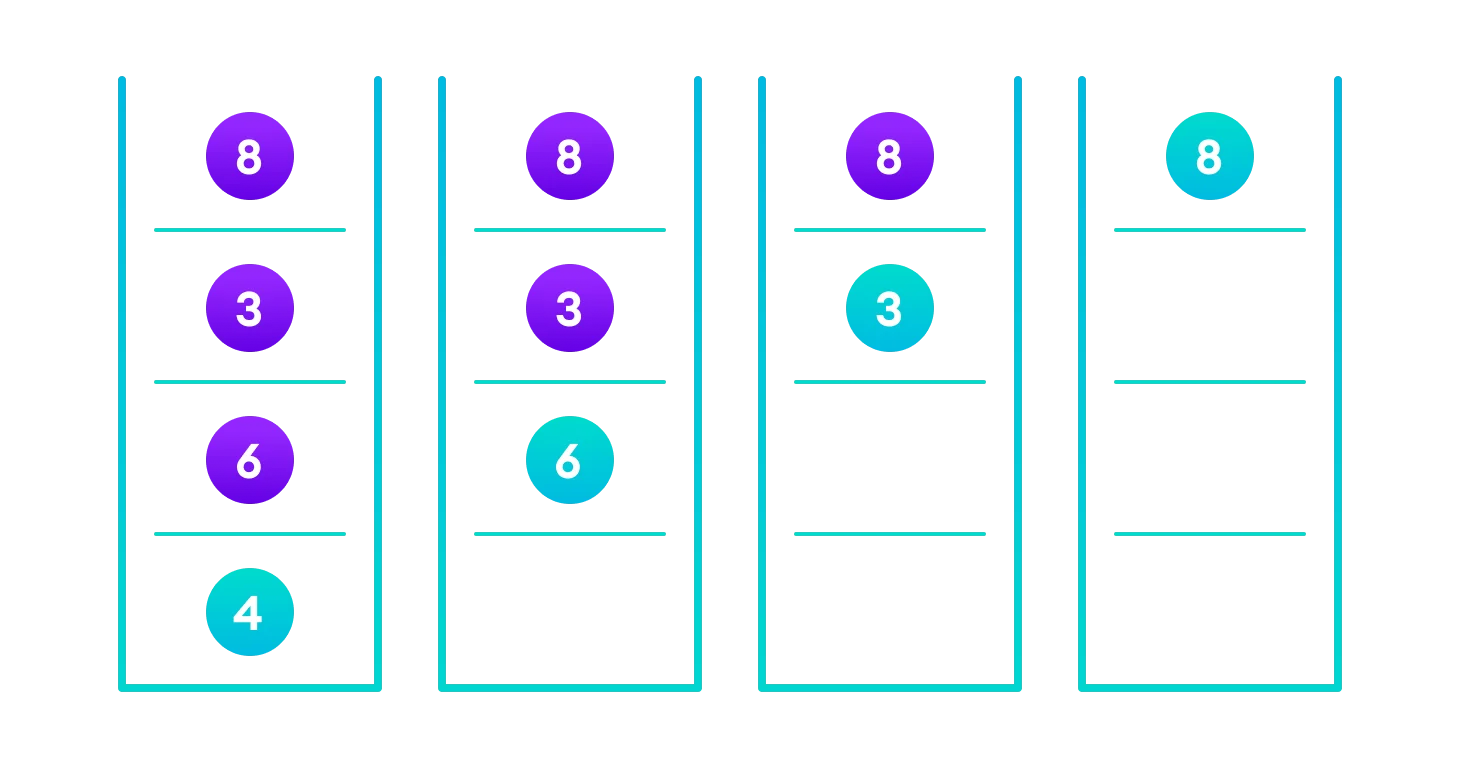

### Deletion Operation
There are three cases for deleting a node from a binary search tree.

#### Case I
In the first case, the node to be deleted is the leaf node. In such a case, simply delete the node from the tree.

4 is to be deleted

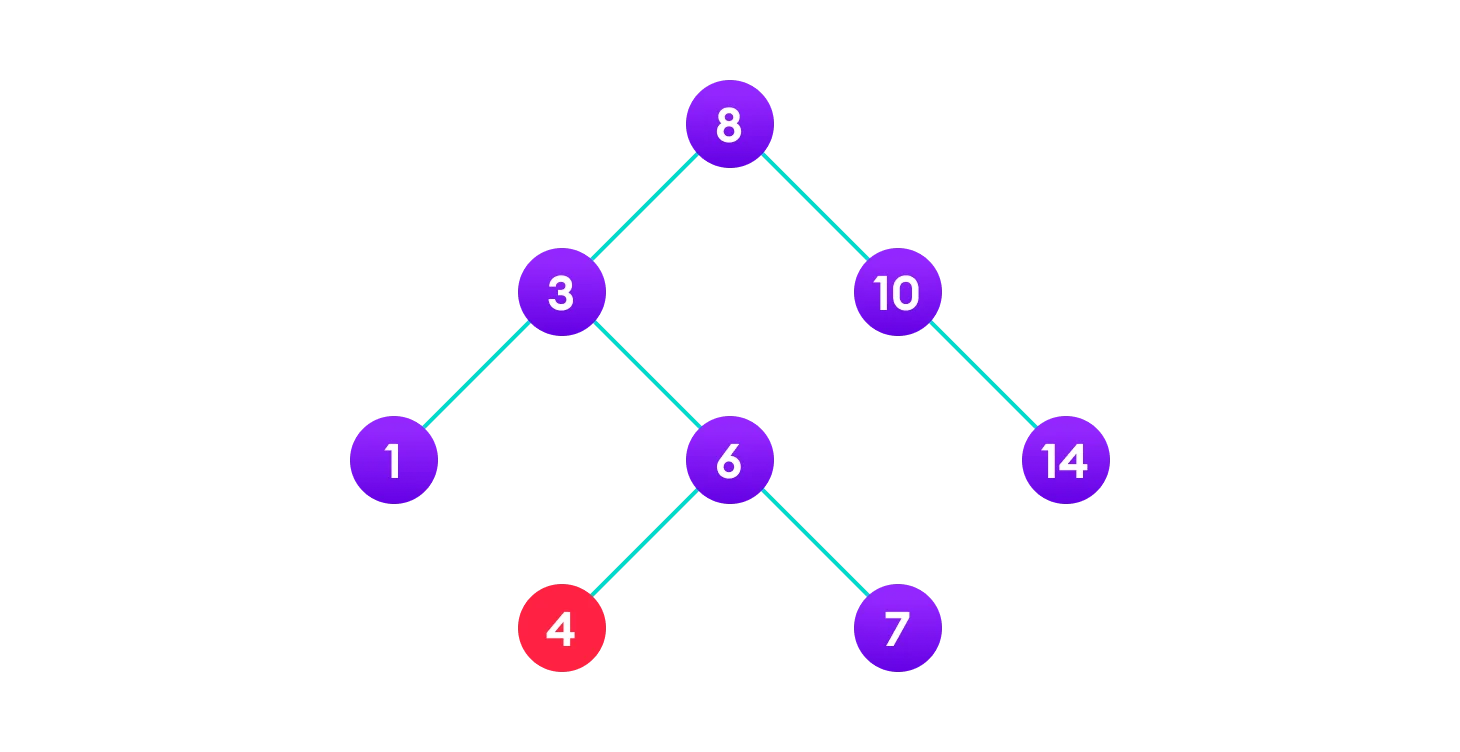

Delete the node

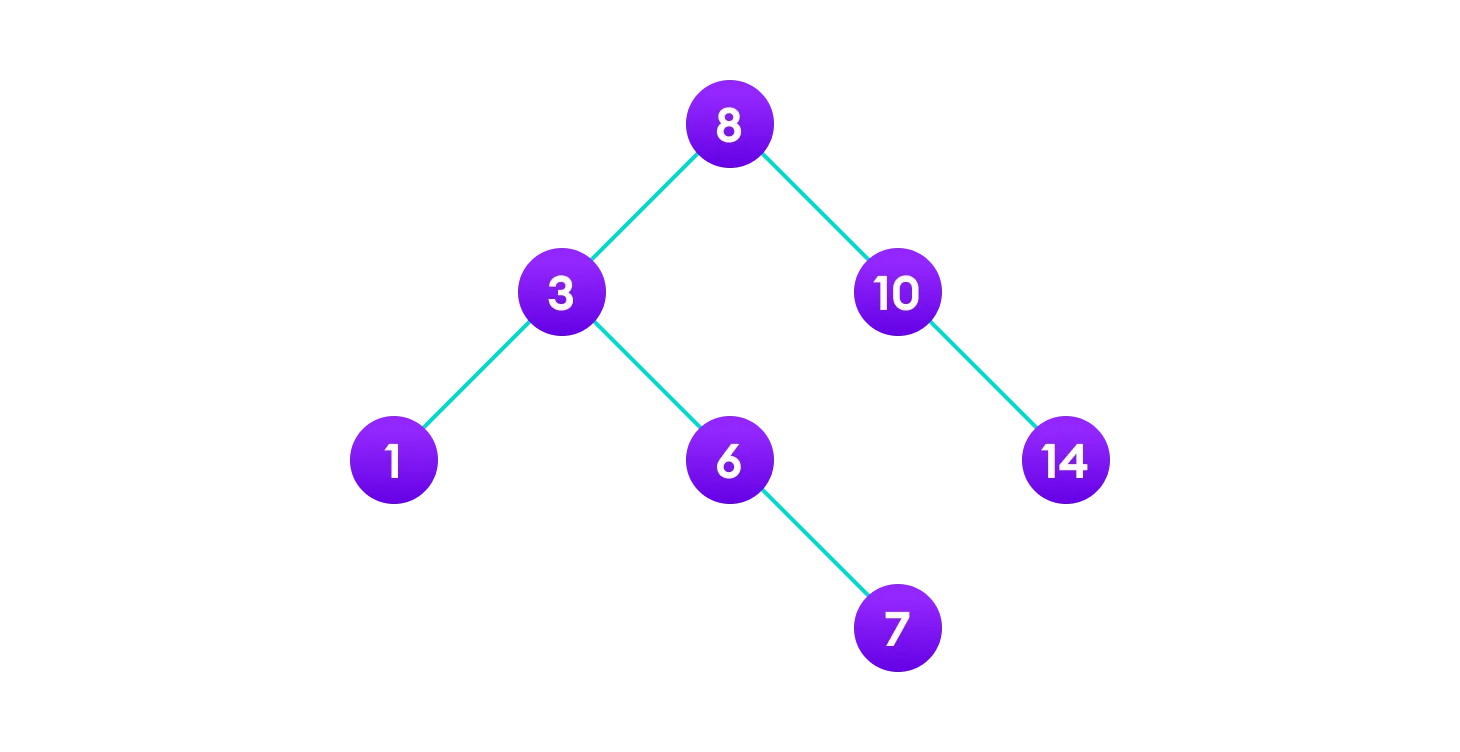

### Case II
In the second case, the node to be deleted lies has a single child node. In such a case follow the steps below:

    1. Replace that node with its child node.
    2. Remove the child node from its original position.
    
6 is to be deleted
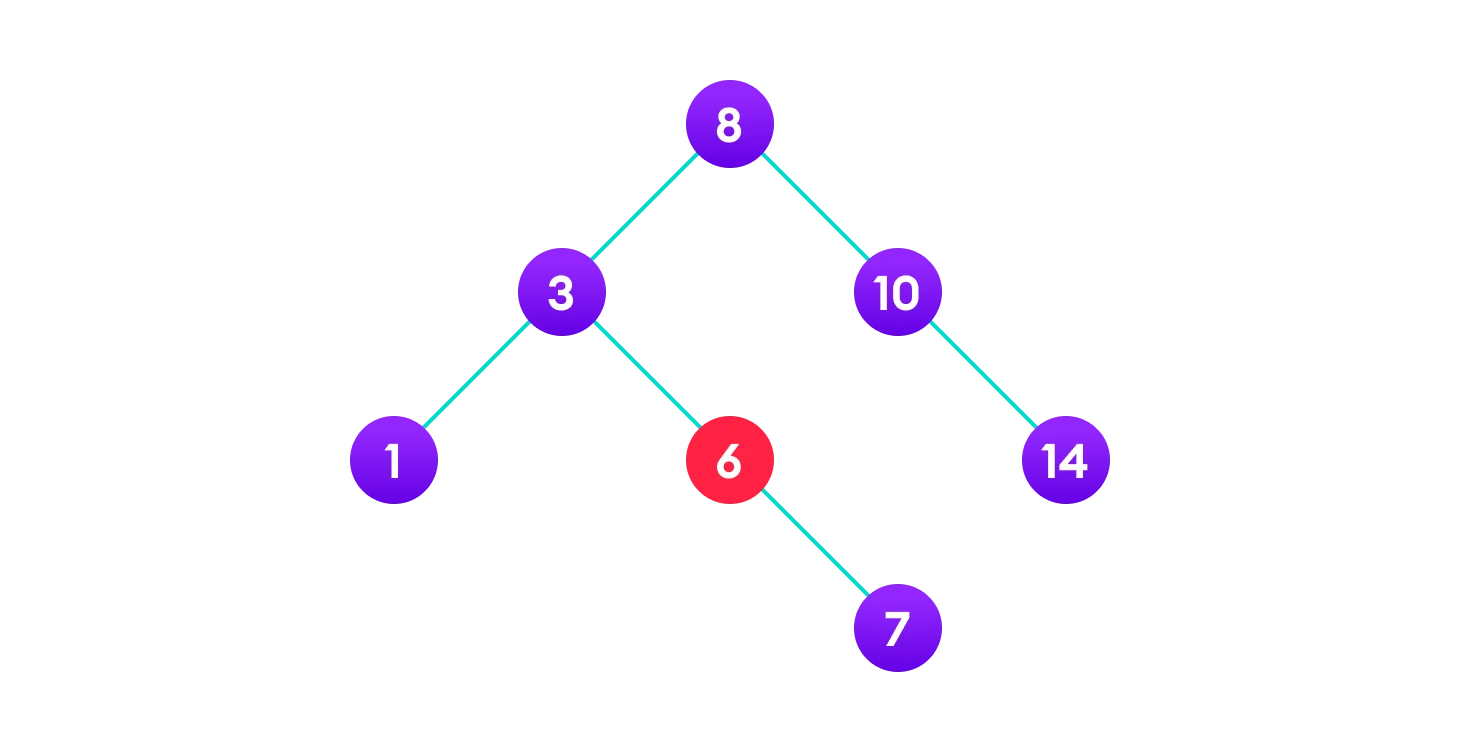

 copy the value of its child to the node and delete the child

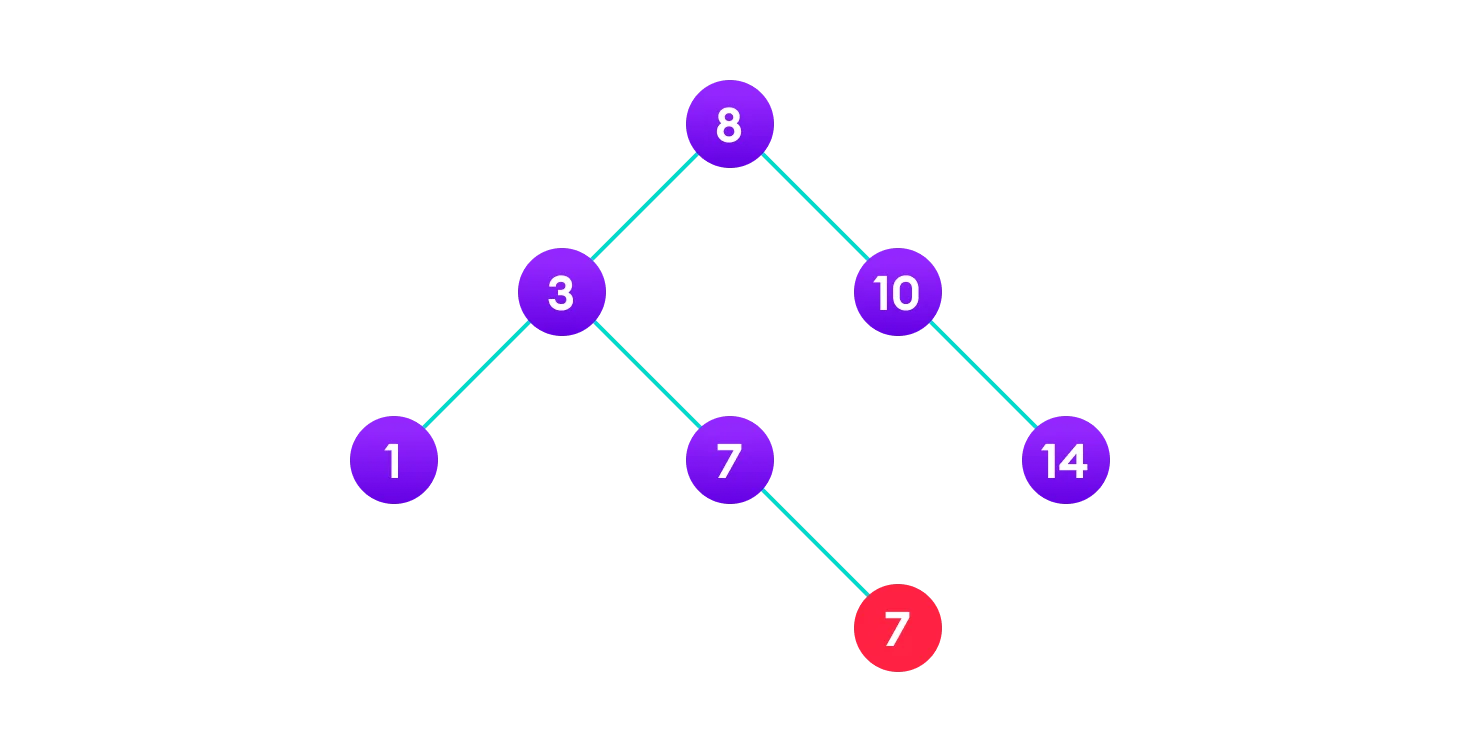

Final tree

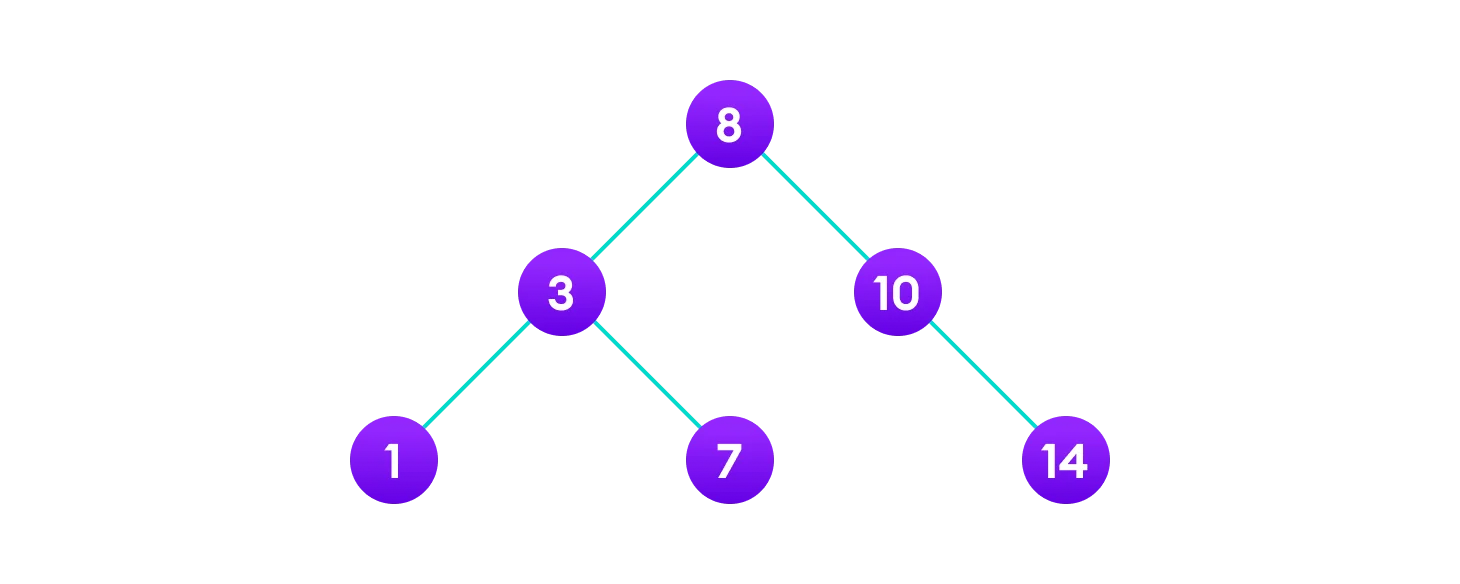

### Case III
In the third case, the node to be deleted has two children. In such a case follow the steps below:

    1. Get the inorder successor of that node.
    2. Replace the node with the inorder successor.
    3. Remove the inorder successor from its original position.

3 is to be deleted

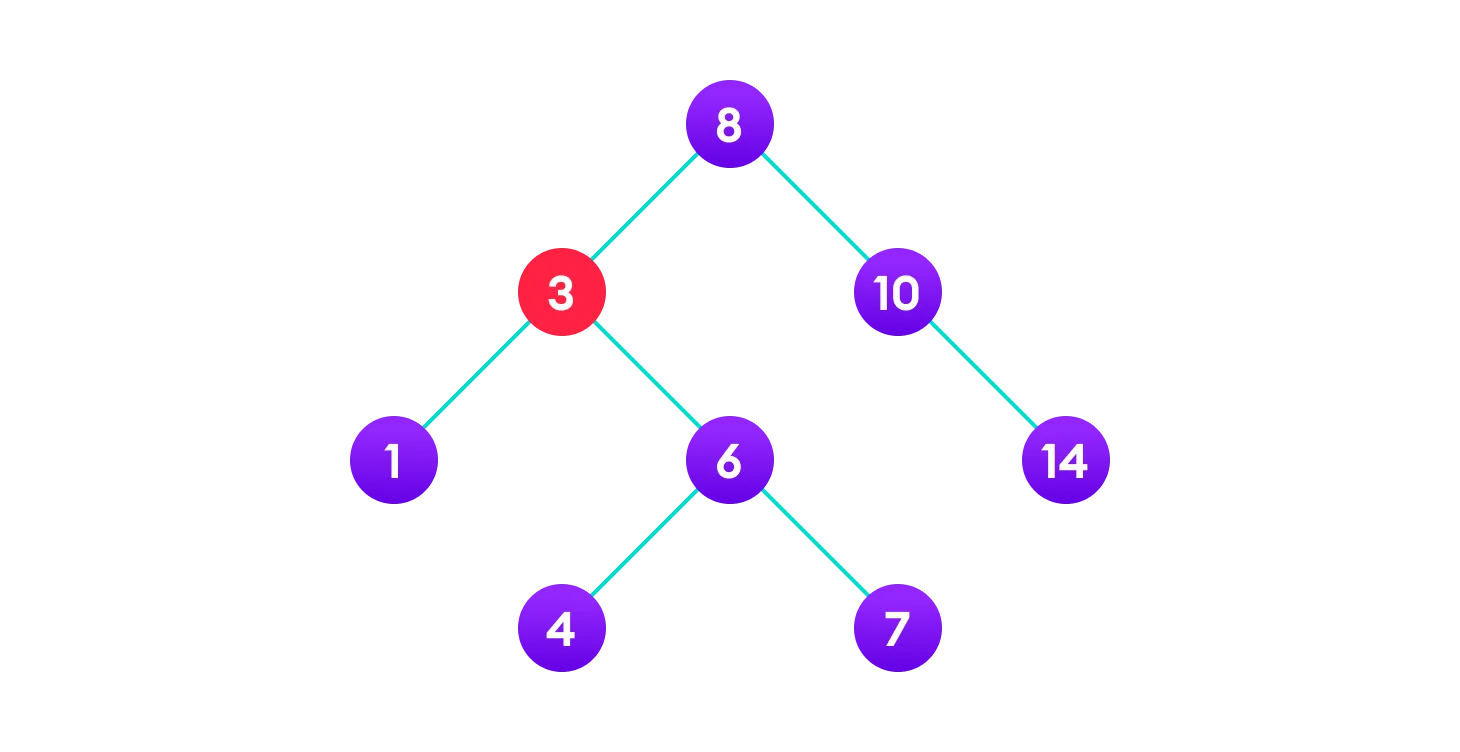

Copy the value of the inorder successor (4) to the node

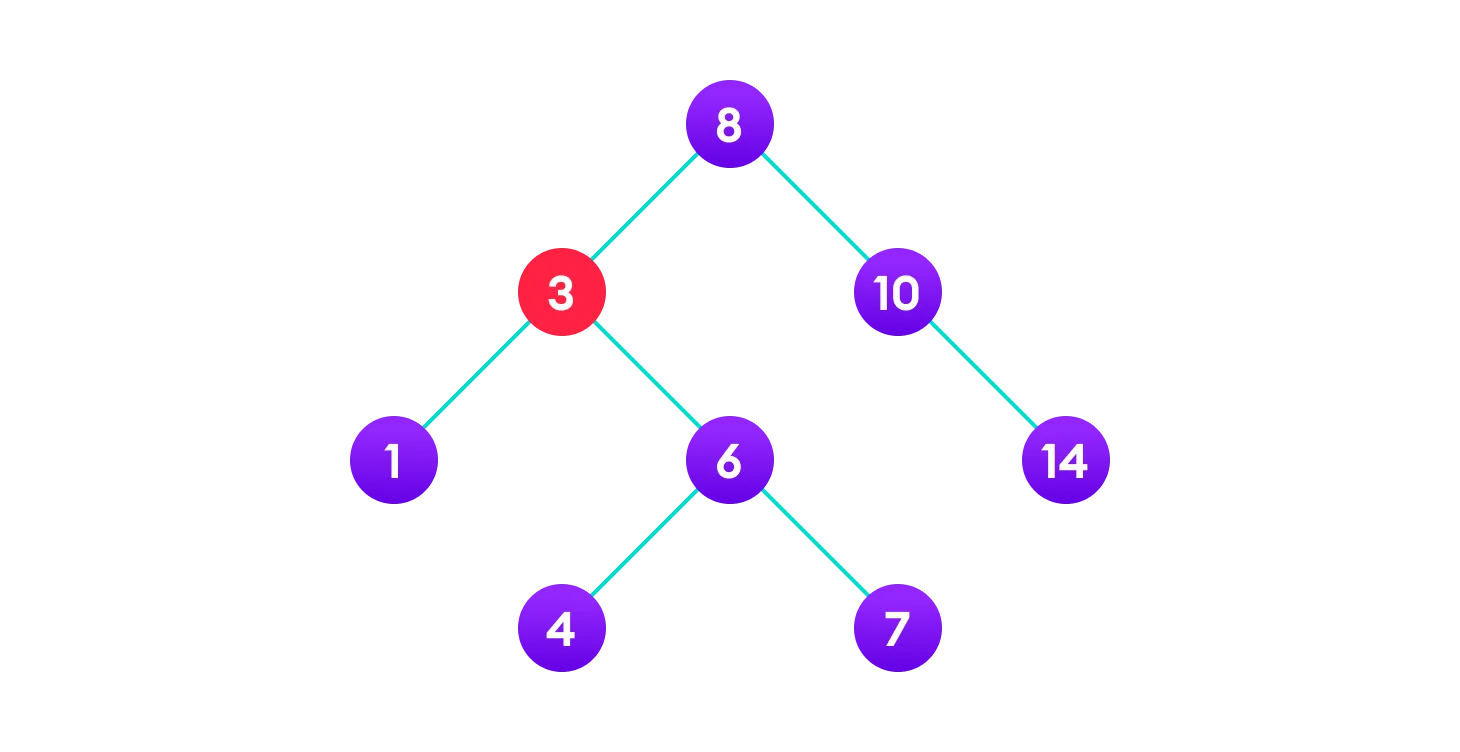

Delete the inorder successor

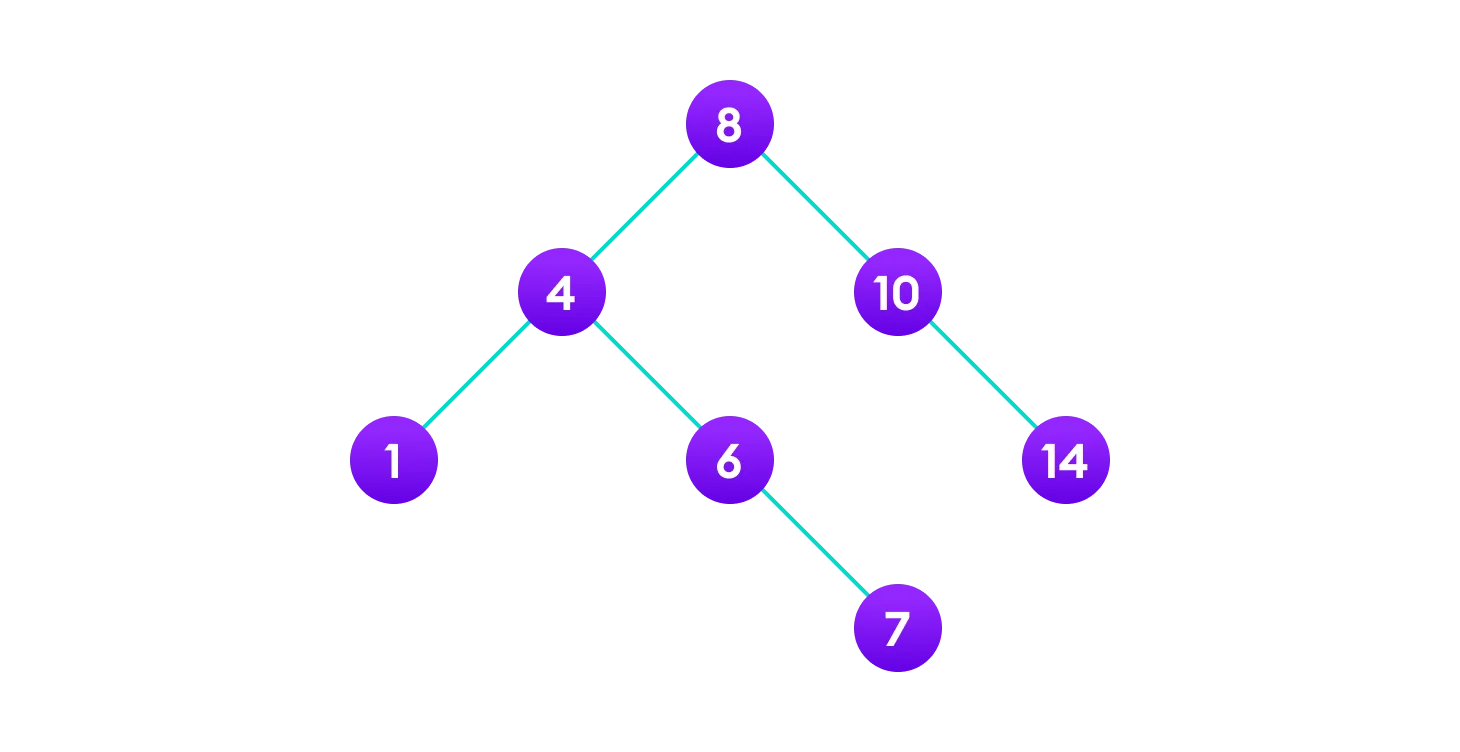


In [1]:
# Binary Search Tree operations in Python
# Create a node
class Node:
    def __init__(self, key):
        self.key = key
        self.left = None
        self.right = None
# Inorder traversal
def inorder(root):
    if root is not None:
        # Traverse left
        inorder(root.left)
        # Traverse root
        print(str(root.key) + "->", end=' ')
        # Traverse right
        inorder(root.right)

# Insert a node
def insert(node, key):
    # Return a new node if the tree is empty
    if node is None:
        return Node(key)
    # Traverse to the right place and insert the node
    if key < node.key:
        node.left = insert(node.left, key)
    else:
        node.right = insert(node.right, key)
    return node


# Find the inorder successor
def minValueNode(node):
    current = node
    # Find the leftmost leaf
    while(current.left is not None):
        current = current.left
    return current
# Deleting a node
def deleteNode(root, key):
    # Return if the tree is empty
    if root is None:
        return root
    # Find the node to be deleted
    if key < root.key:
        root.left = deleteNode(root.left, key)
    elif(key > root.key):
        root.right = deleteNode(root.right, key)
    else:
        # If the node is with only one child or no child
        if root.left is None:
            temp = root.right
            root = None
            return temp

        elif root.right is None:
            temp = root.left
            root = None
            return temp

        # If the node has two children,
        # place the inorder successor in position of the node to be deleted
        temp = minValueNode(root.right)

        root.key = temp.key

        # Delete the inorder successor
        root.right = deleteNode(root.right, temp.key)

    return root


root = None
root = insert(root, 8)
root = insert(root, 3)
root = insert(root, 1)
root = insert(root, 6)
root = insert(root, 7)
root = insert(root, 10)
root = insert(root, 14)
root = insert(root, 4)

print("Inorder traversal: ", end=' ')
inorder(root)

print("\nDelete 10")
root = deleteNode(root, 10)
print("Inorder traversal: ", end=' ')
inorder(root)

Inorder traversal:  1-> 3-> 4-> 6-> 7-> 8-> 10-> 14-> 
Delete 10
Inorder traversal:  1-> 3-> 4-> 6-> 7-> 8-> 14-> 